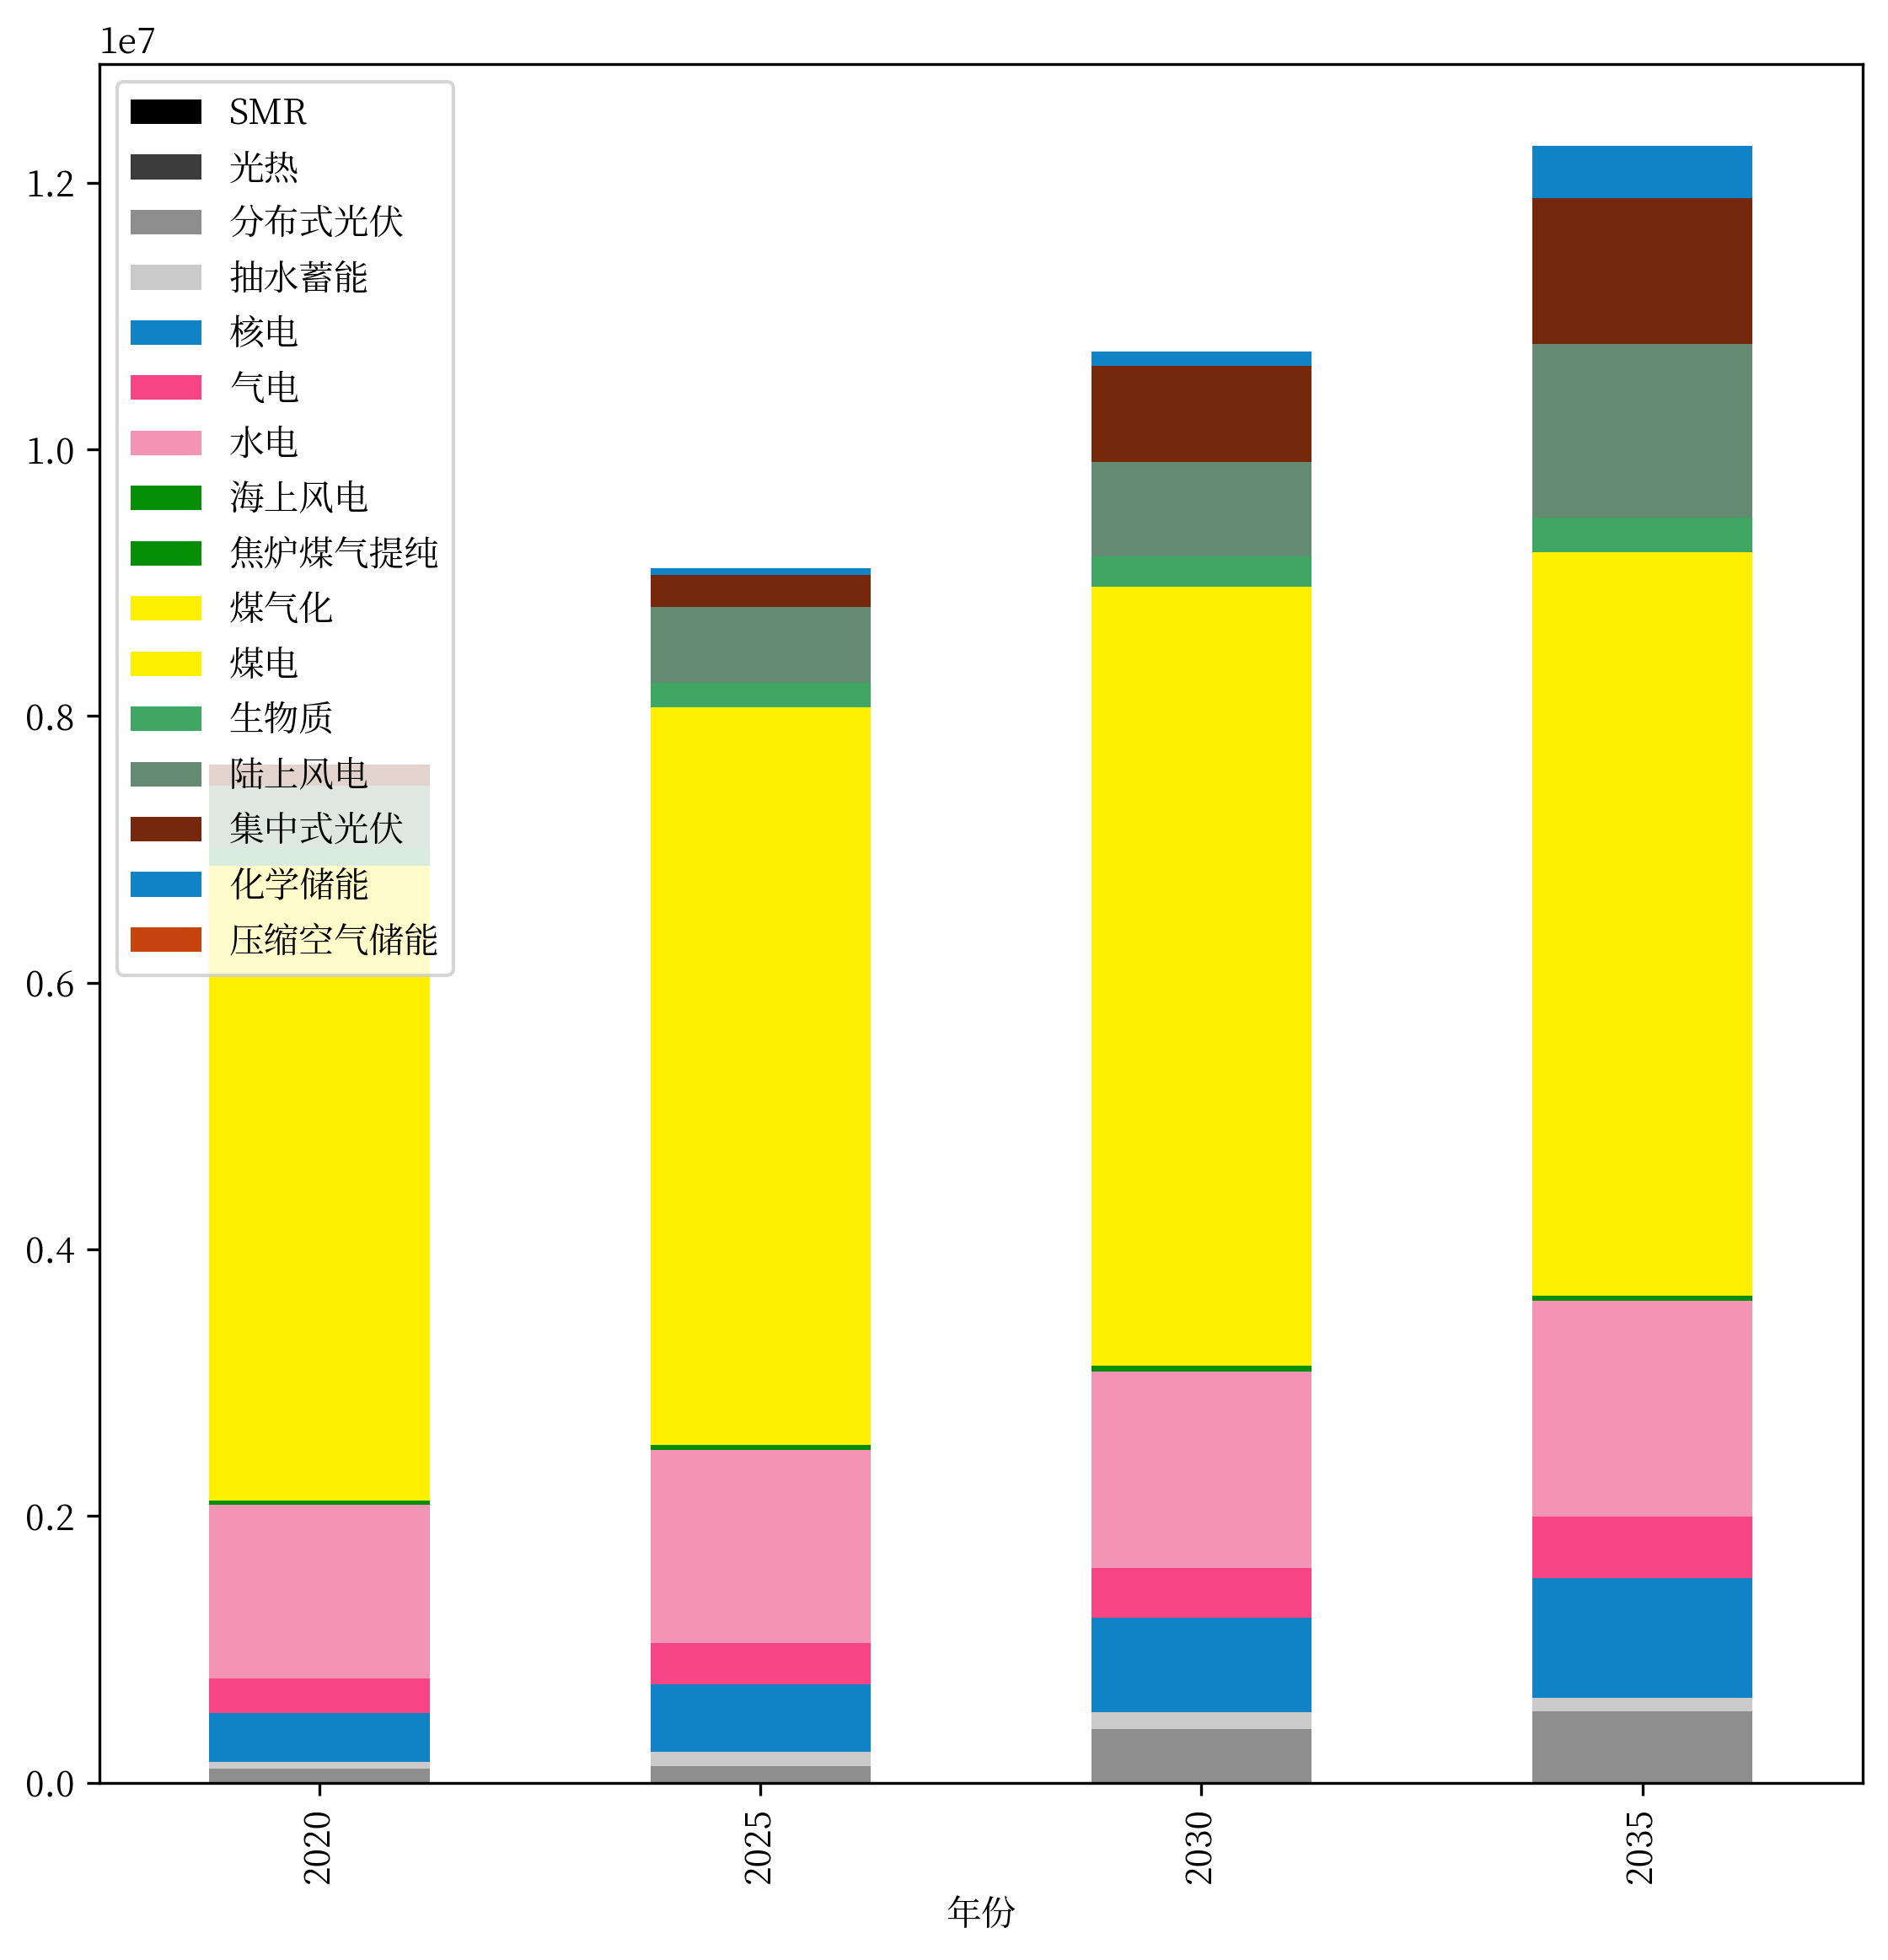

In [1]:
from data_wiz import *
from mplfonts.bin.cli import init
from mplfonts import use_font

In [2]:
file_index_list = [
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1排放.xlsx",
        "focused_index": "CO2 Emissions (kilotons)",
        "columns": ["CO2 Emissions (kilotons)", "NOX Emissions (tons)", "SO2 Emissions (tons)",
                    "CO2 Emissions from G&B H2 Production (kilotons)",
                    "CO2 Emissions from COG H2 Production (kilotons)",
                    "CO2 Emissions from H2 Production (kilotons)"]
    },
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1产量.xlsx",
        "focused_index": "Electricity Generation (GWh)",
        "columns": ["Electricity Generation (GWh)", "Planned Curtailment (GWh)", "Hydrogen Production (MWh)",
                    "Hydrogen Production (10000 Ton)", "Heat Generation (TJ)"]
    }
]

ref = RefData("/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/color_index.xlsx")
data = WorkingData(file_index_list, ref)

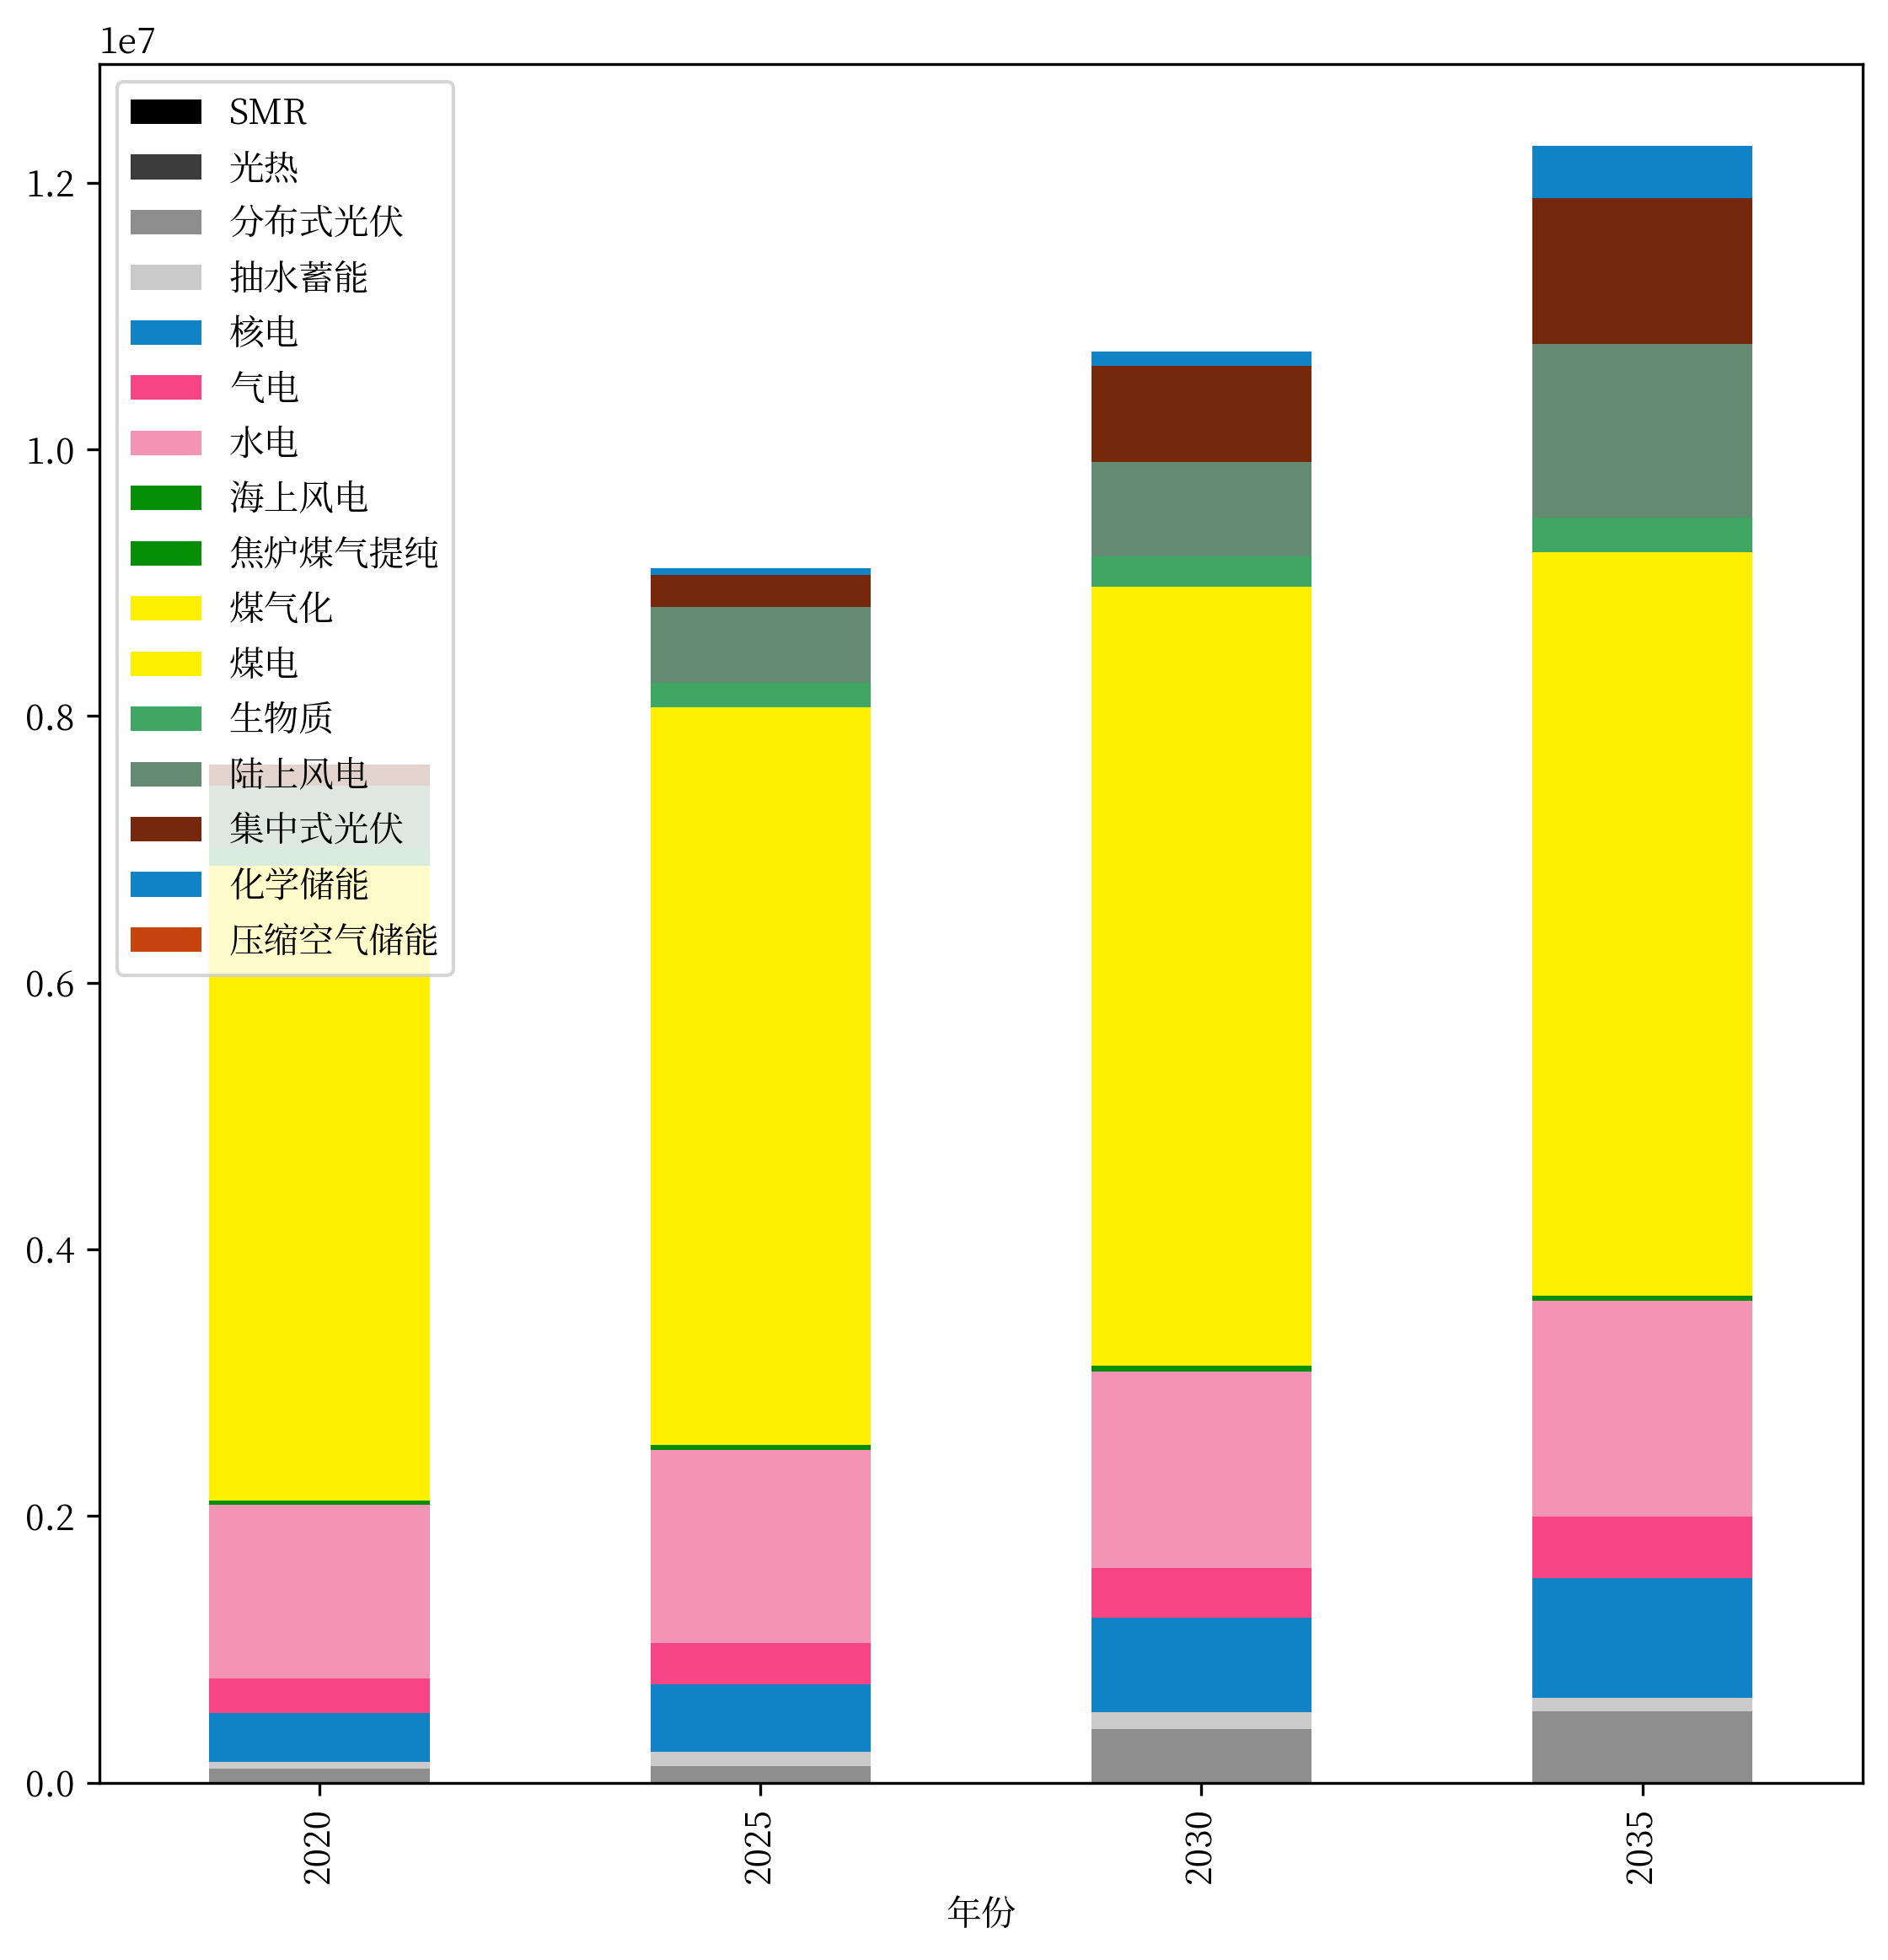

In [3]:
data.rule_out("全国")
data.calc_complex_index('CO2 Emissions (kilotons)', 'Electricity Generation (GWh)')

data.draw("Electricity Generation (GWh)", focused_region="Beijing", scatter=False)

In [4]:
ref.color_scheme

{'煤电': '#000000',
 '煤电CCS': '#3C3C3C',
 '气电': '#8E8E8E',
 '气电CCS': '#CACACA',
 '水电': '#1083C7',
 '核电': '#F74484',
 '先进核电': '#F394b5',
 '陆上风电': '#068E06',
 '海上风电': '#068E06',
 '集中式光伏': '#FFF000',
 '分布式光伏': '#FFF000',
 '生物质': '#3FA663',
 'BECCS': '#648A71',
 '热泵': '#75280b',
 '抽水蓄能': '#1083C7',
 '储热': '#C74310',
 '压缩空气储能': '#0C4769',
 '化学储能': '#3F63A6',
 '光热': '#DEEA0F',
 '煤气化': '#000000',
 '煤气化+CCS': '#3C3C3C',
 'SMR': '#8E8E8E',
 'SMR+CCS': '#CACACA',
 '焦炉煤气提纯': '#521801',
 '碱性电解槽': '#5C971C',
 '质子交换膜电解槽': '#87F014',
 '固体氧化物电解槽': '#F394b5'}